# Introduction to Bayesian Learning
Author: Volker Krueger

## Numbers Dataset

In this assignment, we will apply a Bayesian classifier to recognise handwritten 5-digit zip-codes based on the MNIST dataset. The MNIST dataset is a set of handwritten digits, and our job is to build a python program that takes as input an image of a digit, and outputs what digit it is. We have a dataset of handwritten digits from 0 to 9.

In [433]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image



samples_per_class = 500
number_of_classes = 10

BASE_DIR = '/media/hi8826mo-s/BEEE-DE51/Ultimi/EDAN95_Applied_Machine_Learning/labs/lab6/'
filelist = sorted(glob.glob(BASE_DIR + 'data/*/*.png'))

x = np.array([np.array(Image.open(fname)) for fname in filelist])
y = np.zeros(number_of_classes * samples_per_class,dtype=int)

for cls in range(1,number_of_classes):
    y[(cls*500):(cls+1)*500] = cls   



## Visualizing the Dataset

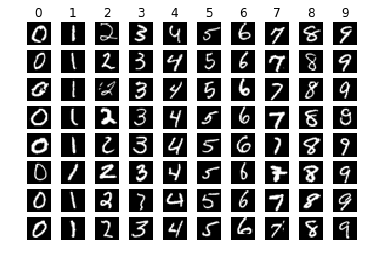

In [434]:
examples_per_class = 8

for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        
        if i == 0:
            plt.title(str(cls))
plt.show()

## Mean

compute the mean of each class and display

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 2 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ...

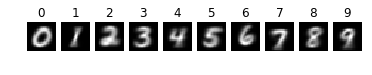

In [47]:
mean_of_class = np.zeros((10,20,20))

for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    mean_of_class[cls] = np.mean(x[idxs],axis=0)
    #print(x[idxs])
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
    
plt.show()


## Generate Training and Testing data, and visualize
we need to split the data into a training dataset that Naive Bayes can use to make predictions and a test dataset that we can use to evaluate the accuracy of the model.

In [435]:
#######################################################################
# x_train will contain the training data
# y_train will contain the correct classes of the training data
# x_test will contain the test data
# y_test will contain the correct classes for the test data
#######################################################################

x_train = np.zeros((4000,20,20))
y_train = np.zeros(4000)

x_test = np.zeros((1000,20,20))
y_test = np.zeros(1000)

for cls in range(number_of_classes):
    idx = cls*400
    idx1 = cls*500
    idx2 = cls*100
    
    x_train[idx:idx+400,:,:] = x[idx1:idx1+400,:,:]
    y_train[idx:idx+400] = y[idx1:idx1+400]
    
    x_test[idx2:idx2+100,:,:] = x[idx1+400:idx1+500,:,:]
    y_test[idx2:idx2+100] = y[idx1+400:idx1+500]
    

**Visualize for training data**

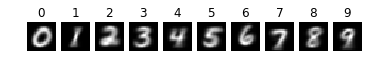

Mean of class 
 [[[0.     0.     0.     ... 0.     0.     0.    ]
  [0.     0.     0.     ... 0.     0.     0.    ]
  [0.     0.     0.     ... 0.0625 0.     0.    ]
  ...
  [0.     0.     0.05   ... 0.     0.     0.    ]
  [0.     0.     0.     ... 0.     0.     0.    ]
  [0.     0.     0.     ... 0.     0.     0.    ]]

 [[0.     0.     0.     ... 0.     0.     0.    ]
  [0.     0.     0.     ... 0.     0.     0.    ]
  [0.     0.     0.0025 ... 0.0575 0.     0.    ]
  ...
  [0.     0.     0.0025 ... 0.     0.     0.    ]
  [0.     0.     0.     ... 0.     0.     0.    ]
  [0.     0.     0.     ... 0.     0.     0.    ]]

 [[0.     0.     0.     ... 0.     0.     0.    ]
  [0.     0.     0.     ... 0.155  0.     0.    ]
  [0.     0.     0.0025 ... 0.1975 0.0025 0.    ]
  ...
  [0.     0.     0.285  ... 0.1025 0.0225 0.0125]
  [0.     0.     0.     ... 0.     0.     0.    ]
  [0.     0.     0.     ... 0.     0.     0.    ]]

 ...

 [[0.     0.     0.     ... 0.     0.     0.    ]
  [0

In [436]:
mean_of_class_trn = np.zeros((10,20,20))
#stdev_of_class = np.zeros((10,20,20))

for cls in range(number_of_classes):
    idxs = np.where(y_train == cls)[0]
    mean_of_class_trn[cls] = np.mean(x_train[idxs], axis=0)
    
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
    
plt.show()

print('Mean of class \n', mean_of_class_trn)
print('\n')
#print('standard deviation of class \n', stdev_of_class)

**Visualize for testing data**

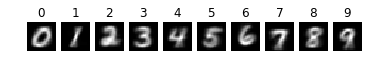

In [437]:
mean_of_class_test = np.zeros((10,20,20))

for cls in range(number_of_classes):
    idxs = np.where(y_test == cls)[0]
    mean_of_class_test[cls] = np.mean(x_test[idxs],axis=0)
    
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap ='gray')
    plt.axis('off')
    plt.title(str(cls))
    
plt.show()

In [438]:
stdev_of_class = np.zeros((len(x_train),20,20))

for cls in range(number_of_classes):
    # use vectorize calculation
    idxs = np.where(y_train == cls)[0]
    #print(idxs.shape)
    stdev_of_class[cls] = np.std(x_train[idxs], axis=0)

#print('standard deviation of class \n', stdev_of_class[1])
stdev_of_class.shape   

(4000, 20, 20)

## put your code for the naive Bayesian classifier here

What is Naive Bayes algorithm?

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

The Naive Bayes algorithm is an intuitive method that uses the probabilities of each attribute belonging to each class to make a prediction. It is the supervised learning approach you would come up with if you wanted to model a predictive modeling problem probabilistically.

The probability of a class value given a value of an attribute is called the conditional probability. By multiplying the conditional probabilities together for each attribute for a given class value, we have a probability of a data instance belonging to that class.
$$p(x\vert y = i) = \Pi_i p(x_i | y)$$
Here x represents the image, or more precisely, the pixel values of the image formatted as a vector, and y represents the digit, which can be 0, 1, …, 9.

To make a prediction we can calculate probabilities of the instance belonging to each class and select the class value with the highest probability.
$$ \arg \max_i P(x|y = i)$$

We recall that pixels represent light intensity, and light intensity is actually continuous. It’s only discrete inside a computer because computers are discrete. A reasonable first-guess for modeling continuous data is the multivariate Gaussian or the multivariate Normal.
In this way we can use the Gaussian distribution:
$$ p(x\vert y = i) = \Pi_{i=0} N(x_i | \mu_i, \sigma_i²) = \Pi_{i=0} \frac{1}{\sqrt(2 \pi \sigma_i²)} \exp (\frac{-1}{2}\frac{(x-\mu_i)²}{\sigma_i²})$$

Naive bases is often described using categorical data because it is easy to describe and calculate using ratios. A more useful version of the algorithm for our purposes supports numeric attributes and assumes the values of each numerical attribute are normally distributed (fall somewhere on a bell curve). Again, this is a strong assumption, but still gives robust results.

Naive bayes simplifies the calculation of probabilities by assuming that the probability of each attribute belonging to a given class value is independent of all other attributes. This is a strong assumption but results in a fast and effective method. In this way, Naive Bayes Classifier makes **independence assumptions** to get a diagonal covariance matrix. That's why it uses a much simpler 1D Gaussian version $$p(x_i, x_j) = p(x_i) p(x_j)$$

We can divide this part into the following tasks:

    Calculate Gaussian Probability Density Function
    Calculate Class Probabilities
    Make a Prediction
    Estimate Accuracy

## Standard deviation
compute the std of each class and display

In [ ]:
mean_of_class = np.zeros((10,20,20))
#stdev_of_class = np.zeros((len(x_train),20,20))
stdev_of_class = np.zeros((10,20,20))

clses = np.zeros((10,20,20))

for cls in range(number_of_classes):
    # Use vectorize calculation
    idxs = np.where(y_train == cls)[0]
    
    for row in range(x_train[idxs].shape[0]):
        # Going through each row
        for col in range(x_train[idxs].shape[1]):
            # Going through each column
            stdev_of_class[idxs][row][col] = np.std(x_train[idxs][row][col], axis=0)
            
            # np.append(stdev_of_class, np.std(x_train[idxs][row][col], axis=0))
    #np.append(clses, )
print('standard deviation of class \n', stdev_of_class[1])
stdev_of_class.shape

mean_of_class = np.zeros((10,20,20))
#stdev_of_class = np.zeros((len(x_train),20,20))
stdev_of_class = np.zeros((10,20,20))

clses = np.zeros((10,20,20))


for cls in range(number_of_classes):
    # use vectorize calculation
    idxs = np.where(y_train == cls)[0]
    #print(idxs.shape)
    #stdev_of_class[cls] = np.std(x_train[idxs], axis=0)
    
#print('Mean of class \n', mean_of_class)
#print('\n')
#print('standard deviation of class \n', stdev_of_class)
#stdev_of_class.shape

    
#print(len(idxs))
#print(type(idxs))
#print(len(stdev_of_class))
    
    for row in range(x_train[idxs].shape[0]):
        for col in range(x_train[idxs].shape[1]):
            stdev_of_class[idxs][row][col] = np.std(x_train[idxs][row][col], axis=0)
            
            #np.append(stdev_of_class, np.std(x_train[idxs][row][col], axis=0))
    
    
print('standard deviation of class \n', stdev_of_class[1])
stdev_of_class.shape

In [378]:
mean_of_class = np.zeros((10,20,20))
stdev_of_class = np.zeros((10,20,20))
gaussians = dict()

for cls in range(number_of_classes):
    idxs = np.where(y_train == cls)[0]
    
    #mean_of_class[cls] = np.mean(x_train[idxs], axis=0)
    #stdev_of_class[cls] = np.std(x_train[idxs], axis=0)
    
    # Creating a dictionary:
    gaussians[cls] = {
        'class': cls,
        'mean': np.mean(x_train[idxs], axis=0),
        'stdev': np.std(x_train[idxs], axis=0)
    }
    
    
#print(gaussians[5].get('class'))
#print(mean_of_class[0])    

    

In [379]:
import math

def gaussProbability(x, mean, stdev):
    if stdev == 0:
        stdev = stdev + 1
    
    #exponent = math.exp(-(math.pow(x - mean, 2)/(2*math.pow(stdev, 2))))
    #return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
    return (x - mean)**2


In [264]:
# for i varje gaussians:
# gaussProbability(x_test,gaussians[i].mean,gaussians[i].stdev)
#
#


In [428]:
def classProbabilities(summaries, inputVector):
    probs = {}
    probabilities = dict()
    
    #print(len(summaries))
   # for classValue, classSummaries in summaries.items():
   # for classValue, classSummaries in summaries.items():
    #    probabilities[classValue] = 0
    
    for q in range(len(inputVector)):
        x = inputVector[q]
        #print(x)
        for i in range(len(summaries)):
            probs[i] = 0
            mean, stdev = summaries[i].get('mean'), summaries[i].get('stdev')
            #print(mean)
        
            #print(x.shape)
            # calculate probability products
            for j in range(len(mean)):
                for k in range(len(mean)):
                    probs[i] += gaussProbability(x[j][k], mean[j][k], stdev[j][k])
        print(probs)
        probabilities[q] = {'invec': q, 'probs': probs}
    #print(probabilities)       
    return probabilities

#### Bayesian Categorization/Classification
Given features x = (x1 , ... , xm ) predict a label y

In [429]:
# Iterera över alla probabilities (den är 1x1000). Ta max-value (den klass vi gissar på)

def predict(summaries, inputVector):
    #print(inputVector.shape)
    probabilities = classProbabilities(summaries, inputVector) #probabilities är en dictionary
    
    #bestLabel, bestProb = None, -1
    best = np.zeros(1000)
    for q in range(len(inputVector)):
        probout = probabilities[q].get('probs')
        #print(probout)
        #listprobs = list(probout.values())
        bestindex = max(probout, key=probout.get) # ger denna verkligen max???
        best[q] = bestindex
    #print(best)
    #print(len(best))
    return best

# Iterera över alla probabilities (den är 1x1000). Ta max-value (den klass vi gissar på)

def predict(summaries, inputVector):
    #print(inputVector.shape)
    probabilities = classProbabilities(summaries, inputVector) #probabilities är en dictionary
    
    bestLabel, bestProb = None, -1
    
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
            #print(bestLabel)
            
    return bestLabel

In [430]:
#input: x_test
#output: y_test_pred
def NaiveBayesian (x_test):
    y_test_pred = predict(gaussians,x_test)
    #print(type(y_test_pred))
    
    return y_test_pred

## now lets run your code and evaluate your accuracy

In [431]:
# Evaluate your classifier on the test set
#print(x_test.shape)
y_test_pred = NaiveBayesian(x_test)
#print(y_test_pred)
test_accuracy = np.mean(y_test == y_test_pred)
print('Test accuracy: ',test_accuracy)

{0: 1225277.7879875, 1: 4292900.815756248, 2: 2844883.617449998, 3: 2843382.02846875, 4: 3316701.2390749995, 5: 2636536.57886875, 6: 3383839.757600002, 7: 3608934.9845500006, 8: 2869303.152375002, 9: 3417481.5655125007}
{0: 1204738.6979875006, 1: 2423219.4657562515, 2: 1892027.7874500009, 3: 1684901.0834687487, 4: 2106442.9340750007, 5: 1302575.6188687496, 6: 1358315.9725999993, 7: 2279709.909550001, 8: 1526899.2923750004, 9: 2011611.9655125}
{0: 2050716.347987501, 1: 3676643.1207562503, 2: 3157861.287449999, 3: 3086236.963468749, 4: 3567766.1640750007, 5: 2908947.5138687505, 6: 3853111.3476, 7: 2905198.809550001, 8: 3060438.3623750005, 9: 3157034.9355124994}
{0: 1740452.207987501, 1: 1617188.0057562503, 2: 1236448.4174500012, 3: 1145650.0984687498, 4: 1065555.9190750006, 5: 985617.7088687493, 6: 1073432.8676000005, 7: 1230924.094549999, 8: 1101294.647375, 9: 1049984.2055125001}
{0: 1701346.0929875, 1: 3489263.845756247, 2: 2504062.8274499993, 3: 2535591.313468753, 4: 3290157.514075000

{0: 1434948.5779875002, 1: 3990021.9107562494, 2: 3162561.9324500007, 3: 2941208.413468749, 4: 3381279.789075, 5: 2328505.2588687483, 6: 2995657.5026000016, 7: 3644826.569550003, 8: 3214538.9023750005, 9: 3480533.440512499}
{0: 1046091.9679874995, 1: 3541272.335756249, 2: 2734351.7074499982, 3: 2563324.2034687498, 4: 2986004.504075001, 5: 2050868.91886875, 6: 2609278.5675999993, 7: 3186522.7895500003, 8: 2766427.8373749987, 9: 2962570.7955124984}
{0: 1546108.7129875005, 1: 3302091.96075625, 2: 2359215.5624499996, 3: 2127787.198468752, 4: 3039526.679074999, 5: 2126358.5738687506, 6: 2804805.1026000003, 7: 3050748.974550002, 8: 2567759.767374999, 9: 3293815.685512503}
{0: 2140849.1679875017, 1: 2521129.5107562486, 2: 2141969.2324500014, 3: 2254486.8834687523, 4: 2679957.0440750015, 5: 2161568.2888687504, 6: 2913501.9876000006, 7: 2590867.4895500005, 8: 2418221.8623750024, 9: 2757752.380512501}
{0: 869242.9429875, 1: 2416376.275756251, 2: 2010258.5124500012, 3: 1684353.88346875, 4: 197476

{0: 2494510.0979875033, 1: 350644.66075624985, 2: 1457547.1774500017, 3: 1354885.8584687489, 4: 1494509.7290750006, 5: 1194656.0088687486, 6: 1444936.2476000004, 7: 1250209.4545499997, 8: 1324321.9473749993, 9: 1244145.4905124996}
{0: 2641648.027987503, 1: 547560.2507562498, 2: 1313845.3924500004, 3: 1530857.338468749, 4: 1718081.5090750009, 5: 1474696.9638687496, 6: 1790030.3426000006, 7: 1798137.8495500006, 8: 1306471.272375, 9: 1665399.5055125004}
{0: 2532408.6479875036, 1: 385834.94575624977, 2: 1332122.8024500012, 3: 1425024.8734687485, 4: 1732079.389075, 5: 1352430.7188687494, 6: 1677134.7776000006, 7: 1657266.1345499998, 8: 1265288.1673750004, 9: 1590551.7105125007}
{0: 2632305.2079875036, 1: 565800.56575625, 2: 1358394.8474500007, 3: 1529956.9584687487, 4: 1752515.2340749998, 5: 1473943.0138687496, 6: 1905006.8176000006, 7: 1802669.95455, 8: 1276193.462375, 9: 1731514.7405124996}
{0: 2585606.322987504, 1: 440179.1657562498, 2: 1324249.8524500001, 3: 1448907.7884687493, 4: 17415

{0: 2572140.9579875027, 1: 3027096.050756251, 2: 2573254.82245, 3: 2176227.6034687515, 4: 2658888.9040749995, 5: 2079813.7188687492, 6: 2178834.7075999985, 7: 2329715.7495500008, 8: 2437230.1573750004, 9: 2231648.4355125003}
{0: 2785074.8129875027, 1: 753085.10575625, 2: 1321864.2024500002, 3: 1628275.363468749, 4: 1687817.3890750015, 5: 1622120.56886875, 6: 1956062.892600001, 7: 1858045.5045500004, 8: 1245448.4973750005, 9: 1706986.5555125005}
{0: 2512803.2729875036, 1: 340027.01575624984, 2: 1459725.3624500008, 3: 1316621.7934687492, 4: 1570214.8840750002, 5: 1257130.3538687497, 6: 1505431.2126000002, 7: 1273629.304549999, 8: 1324789.6973749998, 9: 1295257.2655125}
{0: 2645219.5379875028, 1: 391711.7507562498, 2: 1301363.7474500004, 3: 1493113.8484687493, 4: 1630145.0590749998, 5: 1425442.7788687495, 6: 1726413.4626000007, 7: 1602544.8645499991, 8: 1256056.987375, 9: 1559292.2555125006}
{0: 2651587.7829875043, 1: 616955.72575625, 2: 1259698.5324500005, 3: 1503955.7984687486, 4: 15504

{0: 2468946.067987502, 1: 709993.2107562501, 2: 1406800.252450001, 3: 1462240.4634687488, 4: 1649011.3640750004, 5: 1349353.5538687494, 6: 1907070.5726000012, 7: 1767247.274549999, 8: 1306887.7523749995, 9: 1663591.7455125009}
{0: 2599773.497987503, 1: 623623.31075625, 2: 1245652.71245, 3: 1536385.718468749, 4: 1423375.2440750012, 5: 1423653.0538687499, 6: 1763457.4876000013, 7: 1495615.9545499985, 8: 1264351.6723749998, 9: 1475586.9505125005}
{0: 2665201.862987503, 1: 690242.5757562502, 2: 1247075.21245, 3: 1570720.9184687492, 4: 1417593.8140750008, 5: 1460894.56886875, 6: 1801577.8726000004, 7: 1504621.2245499992, 8: 1277378.2423749997, 9: 1472319.7755125002}
{0: 2661581.4879875025, 1: 452373.7207562501, 2: 1361419.4324500007, 3: 1394573.3334687494, 4: 1507990.1890750008, 5: 1406238.03886875, 6: 1828430.4276000005, 7: 1342868.134549999, 8: 1288257.4023749998, 9: 1401036.2505125005}
{0: 2645635.422987504, 1: 973860.1507562506, 2: 1661928.4774500015, 3: 1385738.5684687493, 4: 1693858.7

{0: 2673220.662987503, 1: 1995525.2307562507, 2: 1034021.1174499992, 3: 1939032.8784687493, 4: 2038736.7140749993, 5: 2009616.8188687507, 6: 1855167.2326000002, 7: 2204841.654550002, 8: 1896905.1223749998, 9: 2241215.505512499}
{0: 2666783.512987503, 1: 2257528.530756251, 2: 1199622.01745, 3: 1884982.3884687503, 4: 1924347.4240750007, 5: 2174704.988868748, 6: 1969703.2676000006, 7: 2772952.4645500015, 8: 1885813.5023749997, 9: 2193875.6255125}
{0: 2949624.8679875033, 1: 1442646.060756251, 2: 1323109.247450001, 3: 2043958.7284687494, 4: 2091666.469075, 5: 2024552.2138687498, 6: 1548959.0326000003, 7: 2135241.8045500005, 8: 1799702.882375, 9: 2043472.0855125012}
{0: 2229462.2929875012, 1: 2135481.26075625, 2: 1078323.8624500015, 3: 1992541.0084687502, 4: 1691131.5740750015, 5: 1762421.8538687502, 6: 1762334.8026000008, 7: 2127858.029550001, 8: 1620329.087375, 9: 1817679.2005125}
{0: 2102594.547987501, 1: 1482790.3357562511, 2: 998707.94245, 3: 1554548.0284687507, 4: 1144801.7740750008, 5

{0: 3026903.9329875023, 1: 3253279.8007562477, 2: 1439922.4124500006, 3: 2409574.9934687517, 4: 2607288.839074999, 5: 2830867.0188687486, 6: 2266201.5276000015, 7: 2676346.024550001, 8: 2407297.8173749996, 9: 2676781.215512502}
{0: 2283006.052987503, 1: 2627667.3357562493, 2: 1200665.7974500002, 3: 2061183.6684687498, 4: 2231710.3390749996, 5: 2255125.1838687477, 6: 1588842.2375999992, 7: 2165284.1745500006, 8: 1934472.9273749993, 9: 2266078.7305125003}
{0: 2678607.987987502, 1: 2876559.330756249, 2: 1395820.6274499996, 3: 2049411.84846875, 4: 2401113.6090749986, 5: 2379091.32886875, 6: 2261003.2625999996, 7: 2377531.574550002, 8: 2006102.5923750012, 9: 2533963.9605125017}
{0: 2775068.2179875025, 1: 2381579.6657562503, 2: 1184563.1874499996, 3: 2067425.768468749, 4: 1876847.1890750015, 5: 2234949.658868748, 6: 1787083.8626000008, 7: 2195813.314550001, 8: 2024818.0873749997, 9: 1962479.365512501}
{0: 2917682.692987502, 1: 2766015.145756251, 2: 1201990.7024500011, 3: 2111057.4984687506, 

{0: 2712754.927987503, 1: 2009715.0607562505, 2: 2038789.7224500014, 3: 1592817.8284687498, 4: 2043491.914075001, 5: 1574366.43886875, 6: 1888147.5226000005, 7: 2458387.634550002, 8: 2016196.947375, 9: 2044507.6705125}
{0: 2348015.7529875026, 1: 1874181.7757562508, 2: 1833737.5324500003, 3: 929895.1634687505, 4: 1831474.3490750003, 5: 1385041.623868749, 6: 2243044.8075999995, 7: 2057502.8995500007, 8: 1549566.4323750003, 9: 1821056.545512501}
{0: 2567108.3679875024, 1: 3366233.625756251, 2: 3057590.042450001, 3: 2521687.663468752, 4: 3146907.634075, 5: 2415001.0338687478, 6: 3035209.632599999, 7: 3016089.259550002, 8: 2855360.8473749994, 9: 2974677.3055124995}
{0: 2122215.2179875025, 1: 1176450.4557562512, 2: 1413772.5074500008, 3: 1013080.0984687502, 4: 2088049.8840749995, 5: 1330192.08386875, 6: 2082258.0376000002, 7: 1992110.4295500012, 8: 1184143.2523750002, 9: 1915735.4005124995}
{0: 2146826.197987501, 1: 1172109.1007562506, 2: 1455701.2074500008, 3: 872282.32346875, 4: 1727237.53

{0: 2216482.022987502, 1: 2324656.080756251, 2: 1941805.2774500018, 3: 1071265.1684687496, 4: 2353983.9540750007, 5: 1785007.4188687492, 6: 2466014.977599999, 7: 2013420.9895500003, 8: 1801288.3223750002, 9: 2183972.5755125005}
{0: 2025174.2829875015, 1: 995224.1007562494, 2: 1358452.67245, 3: 995542.83846875, 4: 1372859.1940750005, 5: 997309.0238687495, 6: 1676835.9626000004, 7: 1331474.45955, 8: 1103496.527375, 9: 1390859.3005124999}
{0: 2426688.2029875047, 1: 537557.6657562498, 2: 1314344.7724500007, 3: 1260044.9184687485, 4: 1537256.0640750006, 5: 1316282.29886875, 6: 1535131.8476000004, 7: 1370734.07955, 8: 1197355.0623749997, 9: 1267420.1955125004}
{0: 2078609.942987502, 1: 1674705.5807562505, 2: 1738389.3124500012, 3: 935592.3284687501, 4: 2158347.0890750005, 5: 1119232.2388687495, 6: 1670545.6626000009, 7: 1975617.879549999, 8: 1333149.282375, 9: 1868376.9505125002}
{0: 2249418.747987503, 1: 1941004.10575625, 2: 1830516.7774500006, 3: 660222.7584687503, 4: 2272028.0490750014, 5

{0: 2233395.6929875016, 1: 2011616.365756252, 2: 1742542.2124500007, 3: 2162299.868468751, 4: 850108.0940749997, 5: 1670353.6588687492, 6: 1715421.9076000007, 7: 1458520.059549999, 8: 1659531.9823750004, 9: 1114466.5855124996}
{0: 2414412.9029875034, 1: 1433724.8257562506, 2: 1436373.9974500004, 3: 1280962.343468749, 4: 821705.0240749996, 5: 971159.4138687487, 6: 1102475.7775999997, 7: 1203761.189549999, 8: 1212263.942375, 9: 830110.5605125006}
{0: 2026987.812987501, 1: 2526106.365756248, 2: 1818393.087450001, 3: 2234459.2584687523, 4: 855315.7090749993, 5: 1751681.1288687491, 6: 1722633.8725999994, 7: 1431886.6245499998, 8: 1804328.7573749996, 9: 1215450.2755124997}
{0: 2137093.1979875015, 1: 2663952.6857562494, 2: 1907188.3324500003, 3: 2365002.173468751, 4: 1303003.1590750008, 5: 1779396.5038687496, 6: 1691902.0976000002, 7: 1994524.5295499996, 8: 2143060.422375, 9: 1753792.4805124998}
{0: 2263824.9229875025, 1: 2367492.3907562485, 2: 1841609.6524500004, 3: 2434328.8534687515, 4: 10

{0: 2111801.947987502, 1: 1714211.0457562518, 2: 1725362.3274500004, 3: 1887561.3784687505, 4: 1042641.8290749992, 5: 1228626.0588687488, 6: 1338618.5276, 7: 1349305.3895499995, 8: 1405385.6923749996, 9: 1029324.4605125004}
{0: 1656997.9279875003, 1: 1946329.0457562506, 2: 1354039.797450001, 3: 1908202.158468749, 4: 1096812.2140750005, 5: 1351236.9688687497, 6: 1070218.6676, 7: 1253222.8195499985, 8: 1382733.717375, 9: 1065055.5505124999}
{0: 2297213.8379875035, 1: 1080842.5507562498, 2: 1509438.1524500002, 3: 1256358.3284687486, 4: 913165.274074999, 5: 1119391.1438687486, 6: 1480515.6526, 7: 981923.0945499993, 8: 1402722.257375, 9: 926353.1055125002}
{0: 2174778.6129875015, 1: 2729770.8057562476, 2: 1744314.5124500007, 3: 2376332.848468751, 4: 1178792.8190750012, 5: 2006613.9638687505, 6: 1902439.0275999994, 7: 1804119.2745499986, 8: 1984721.4423749992, 9: 1639353.8705125009}
{0: 2475670.202987503, 1: 2767493.6607562476, 2: 2331182.342450001, 3: 2292376.0034687533, 4: 1202585.72907499

{0: 1736383.0029875014, 1: 1267666.9107562508, 2: 1685317.442450001, 3: 998144.3484687502, 4: 1320239.9190750015, 5: 682165.4038687493, 6: 1332263.6175999998, 7: 1233500.3995499988, 8: 1105161.5173750003, 9: 1018608.2905125}
{0: 2099583.7629875005, 1: 1413123.0707562496, 2: 1557640.8174500011, 3: 2068414.8284687495, 4: 1555588.6940750019, 5: 1201232.38386875, 6: 1622466.4076, 7: 1665573.9295499998, 8: 1632682.7273749993, 9: 1651192.7555125002}
{0: 2097421.2579875006, 1: 3450786.4857562487, 2: 2484285.1974500013, 3: 2441937.15346875, 4: 3091941.4190750006, 5: 2374061.858868748, 6: 2397210.4376, 7: 3198116.074550002, 8: 2599012.892375, 9: 2967401.435512498}
{0: 2046317.0129875, 1: 1496183.87075625, 2: 1880700.922450001, 3: 1892262.97346875, 4: 1230140.7090749994, 5: 1179728.9688687497, 6: 1771555.6726000002, 7: 1156245.1145499987, 8: 1576622.8123750004, 9: 1045559.9105125009}
{0: 2309828.6579875, 1: 3426194.9507562513, 2: 2895470.9724500007, 3: 2002774.6584687508, 4: 2905174.389075001, 5

{0: 2328688.042987503, 1: 1532405.0407562498, 2: 1538410.1574500003, 3: 1671496.6834687495, 4: 1466322.6690750013, 5: 1326476.1538687504, 6: 1468662.9326000004, 7: 1563103.299549998, 8: 1647310.8323749993, 9: 1532558.5655125002}
{0: 2351244.937987503, 1: 1348813.7057562508, 2: 1478727.5674500011, 3: 1679313.7784687497, 4: 1182067.6540750016, 5: 1213143.0488687498, 6: 1362734.8176000002, 7: 1364498.9095499993, 8: 1499325.7723750002, 9: 1305474.7205125007}
{0: 1739152.4229875004, 1: 2079428.3407562503, 2: 1670790.392450001, 3: 1453628.5634687496, 4: 1770792.3440750013, 5: 979570.3188687493, 6: 1292738.8726000004, 7: 1936898.8095499994, 8: 1314641.987375, 9: 1440751.8505125006}
{0: 2176619.3729875004, 1: 2012751.6257562502, 2: 2063598.5224500005, 3: 1886200.978468751, 4: 1444058.4490750006, 5: 1173459.0188687493, 6: 2073685.027600001, 7: 1604237.9745499995, 8: 1527771.5423749995, 9: 1187164.6755125003}
{0: 2055350.0179875013, 1: 1865182.0557562506, 2: 1689342.3824500004, 3: 1646721.503468

{0: 2349506.6429875027, 1: 2413119.875756249, 2: 1784805.7724500003, 3: 2419577.4184687515, 4: 2168239.8140749997, 5: 1802856.9988687504, 6: 971936.4125999999, 7: 2576536.534550003, 8: 2012775.9023750003, 9: 2162947.3755124994}
{0: 2279927.2229875033, 1: 1828928.530756251, 2: 1474033.9274499996, 3: 1727007.24846875, 4: 1445469.4440750012, 5: 1285245.3088687495, 6: 771496.7975999995, 7: 2021597.0395499999, 8: 1360223.802375, 9: 1467926.5205124998}
{0: 2001602.3279875002, 1: 1407644.740756251, 2: 1222676.7674500006, 3: 1462432.7884687495, 4: 987667.0840749992, 5: 1076277.493868749, 6: 797010.1425999994, 7: 1236842.5195499987, 8: 1367418.307375, 9: 1106234.3355125}
{0: 1948429.5129875003, 1: 2781971.4107562494, 2: 1774795.1724500004, 3: 2534810.613468751, 4: 2118224.909075, 5: 1834250.8438687497, 6: 950740.7425999999, 7: 2645700.1695500026, 8: 2089584.2873750003, 9: 2153924.3155125007}
{0: 2328997.5829875027, 1: 1979298.115756251, 2: 1465497.4724500005, 3: 2119577.623468751, 4: 1597672.12

{0: 1712383.9529875012, 1: 1995552.7557562517, 2: 1567180.0874500012, 3: 1602330.1284687512, 4: 1601500.844075001, 5: 1209513.32386875, 6: 1342199.4075999998, 7: 2039082.2195499989, 8: 1311717.1973750005, 9: 1531986.4355125}
{0: 2088214.6929875002, 1: 2778804.075756249, 2: 1821971.0374500002, 3: 2056467.1634687493, 4: 1870267.6040750006, 5: 1736485.3788687494, 6: 778529.7825999995, 7: 2581074.1445500012, 8: 1852545.3173749994, 9: 1897519.6205125}
{0: 2278071.897987503, 1: 3672822.3257562467, 2: 2052454.7274500004, 3: 3036819.158468751, 4: 2456417.639074999, 5: 2583969.60386875, 6: 1379645.7576000001, 7: 3260507.479550001, 8: 2535175.9423750015, 9: 2700863.3005125006}
{0: 2984818.7379875015, 1: 3973714.755756249, 2: 2393348.182449999, 3: 3578466.263468751, 4: 2604445.709074999, 5: 3377562.86886875, 6: 2239191.937600001, 7: 3216123.6345500024, 8: 3370261.812375002, 9: 3137258.6055124993}
{0: 2242798.287987501, 1: 3716259.9157562484, 2: 2175012.48245, 3: 3024207.9234687514, 4: 2277473.829

{0: 2416333.337987502, 1: 1602890.8957562505, 2: 1255230.2724500005, 3: 1657444.5034687489, 4: 1547626.1840750012, 5: 1694099.4888687492, 6: 1872747.5376000002, 7: 1158579.5595499992, 8: 1598876.132375, 9: 1330205.6205125002}
{0: 2388200.977987503, 1: 947953.4157562499, 2: 1295312.3824500013, 3: 1253229.7034687486, 4: 1627378.8840750006, 5: 1427880.6938687498, 6: 1923802.0326, 7: 1174757.3245499984, 8: 1244536.4073749997, 9: 1243419.2105125003}
{0: 2645461.6929875053, 1: 1442121.9557562503, 2: 2020731.5924500013, 3: 1778477.71846875, 4: 1512515.5340750013, 5: 1586417.0288687502, 6: 2099439.7076000003, 7: 838086.0095499995, 8: 1588659.127374999, 9: 1141171.6005124995}
{0: 2655863.092987504, 1: 1452740.9457562503, 2: 1451438.8374500005, 3: 1380898.6584687494, 4: 1239730.3390750014, 5: 1474430.2388687502, 6: 1715469.4525999997, 7: 906185.3245499994, 8: 1275743.4223749996, 9: 889676.4105125007}
{0: 2749554.6329875025, 1: 2115767.925756249, 2: 1568445.8624500008, 3: 2031065.1084687489, 4: 2

{0: 2003607.322987501, 1: 2355200.910756251, 2: 2327619.772449999, 3: 2280895.388468751, 4: 1488449.319075001, 5: 1676987.8138687501, 6: 2221332.3476, 7: 1148518.8145499986, 8: 2108143.442375, 9: 1478923.4255125006}
{0: 2057678.7579875002, 1: 2168655.91575625, 2: 2203235.6274500014, 3: 2106755.5284687504, 4: 1376697.859075, 5: 1483481.66386875, 6: 1991271.3926000008, 7: 978753.884549999, 8: 1754324.827375, 9: 1145642.3555125003}
{0: 2467748.522987505, 1: 1695802.325756251, 2: 1778165.6124500015, 3: 1448184.4984687497, 4: 1265968.5440750015, 5: 1384129.6188687494, 6: 1709547.9926, 7: 827133.4995499991, 8: 1690620.7723749992, 9: 1147091.5905124997}
{0: 2007095.3279874998, 1: 2038653.5807562505, 2: 2054572.8974500005, 3: 2111932.9384687496, 4: 1323772.8490750005, 5: 1473694.2888687495, 6: 1967796.5426000005, 7: 1042214.3445499991, 8: 1812418.6123749998, 9: 1253113.7255124997}
{0: 2463245.5579875032, 1: 1497308.7657562508, 2: 1885451.6524500013, 3: 1684207.1734687502, 4: 1279534.4290750008

{0: 2565023.347987502, 1: 1921988.8107562512, 2: 1763988.237450001, 3: 1625323.0334687503, 4: 1536655.139075001, 5: 1481351.9488687497, 6: 1789911.7976000009, 7: 1383919.6495499979, 8: 1378709.6123750005, 9: 1176589.3805125}
{0: 1796906.2479875, 1: 2215562.660756249, 2: 1740885.587450001, 3: 2154249.4084687512, 4: 1612276.3540750004, 5: 1761394.6138687497, 6: 1989400.4026000008, 7: 1912662.38955, 8: 1396619.6973749998, 9: 1548518.5155124997}
{0: 2408774.8879875042, 1: 1130886.105756251, 2: 1473389.5124500012, 3: 1263359.8934687495, 4: 1645891.7290750013, 5: 1234737.2088687487, 6: 1334433.4476, 7: 1658038.44455, 8: 983454.1573750002, 9: 1317800.5955124998}
{0: 2456948.912987503, 1: 2820343.1007562494, 2: 1749129.4724500012, 3: 1998122.8634687506, 4: 1864456.389075001, 5: 2110374.7288687504, 6: 2371727.9826, 7: 2309580.2395500005, 8: 1610160.852375, 9: 1819778.6155125}
{0: 2848876.9429875016, 1: 2833427.8107562508, 2: 1916795.037450001, 3: 1905856.7984687507, 4: 2164471.339075, 5: 215856

{0: 2221719.897987502, 1: 2009748.5107562507, 2: 1968595.602450001, 3: 1652812.8384687502, 4: 901805.194074999, 5: 1271962.058868749, 6: 1582715.2576000004, 7: 1063544.8945499987, 8: 1517001.8723749998, 9: 680950.3955125007}
{0: 2428189.3979875036, 1: 2550182.460756249, 2: 1839660.5474500002, 3: 1864046.0684687514, 4: 1541382.0290750002, 5: 1938909.5038687491, 6: 2093677.5175999994, 7: 1777778.7695499994, 8: 2199425.162375001, 9: 1615810.6305125004}
{0: 2301964.0279875025, 1: 1496003.370756251, 2: 1752132.5274500009, 3: 1464303.8534687494, 4: 1357168.484075001, 5: 1240458.9588687483, 6: 1718770.4526000002, 7: 1070066.3545499984, 8: 1043480.2623749998, 9: 864241.1755125005}
{0: 2345331.7879875028, 1: 1474021.8507562508, 2: 1578771.3824500004, 3: 1421031.0884687488, 4: 901040.4240749992, 5: 1191935.1788687485, 6: 1466185.7626000002, 7: 1079365.064549999, 8: 1271706.3173749999, 9: 720446.3855125002}
{0: 2435770.8329875027, 1: 2049663.1357562507, 2: 2345740.5974500007, 3: 1802425.10346875,

{0: 2615599.867987503, 1: 3244477.165756247, 2: 2431688.962450001, 3: 2729012.0034687505, 4: 1553172.3340750013, 5: 2340320.7688687504, 6: 2353573.8675999995, 7: 1893532.4445499983, 8: 2368375.787375, 9: 1514194.4705125012}
{0: 2409438.432987501, 1: 2110988.1407562494, 2: 1700584.2524500003, 3: 1572266.458468749, 4: 1039326.8040749995, 5: 1420047.2488687485, 6: 1651482.8976, 7: 1503067.389549998, 8: 1612330.0523749995, 9: 957328.0355125004}
{0: 2513303.5029875026, 1: 2044222.6307562513, 2: 2102138.892450001, 3: 1631408.2584687502, 4: 1505003.2440750008, 5: 1496939.5438687492, 6: 1919801.6526000006, 7: 1204067.2045499985, 8: 1349691.822375, 9: 969073.4555125007}
{0: 1878161.9229875004, 1: 2246380.8507562517, 2: 2085111.7124500014, 3: 2044221.9784687504, 4: 1352163.1640750014, 5: 1731963.3488687486, 6: 1848255.2375999999, 7: 1476770.8095499987, 8: 1804052.2673750003, 9: 1215286.2255125004}
{0: 2170032.4979875027, 1: 1151865.9007562508, 2: 1334707.7124500005, 3: 1129092.8534687497, 4: 787

## Let's visualize some of the wrongly classified test samples.

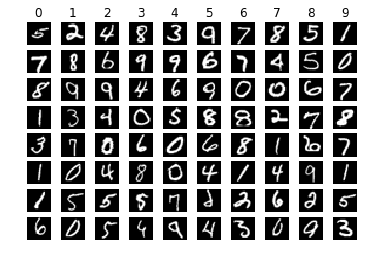

In [12]:
examples_per_class = 8
for cls in range(number_of_classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x_test[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
plt.show()